In [22]:
#importing packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
# Map target labels for better understanding
heart_data['target'] = heart_data['target'].map({1: 'Defective Heart', 0: 'Healthy Heart'})


In [6]:
# Splitting the Features and Target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']


In [7]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [10]:
#train and test the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [11]:
#splitting te data
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Logistic Regression

In [32]:
model = LogisticRegression( max_iter=1000)  # Increase max_iter to 1000 or a higher value
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Predictions on training and testing sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.859504132231405
0.8524590163934426


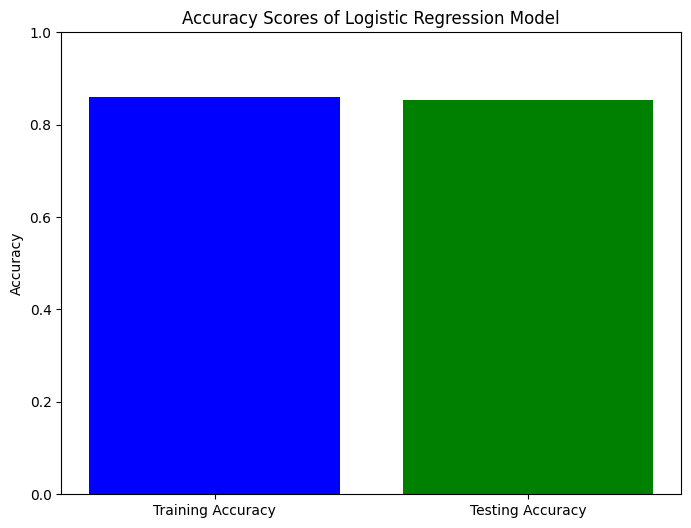

In [40]:

# Plotting the accuracy scores
labels = ['Training Accuracy', 'Testing Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Scores of Logistic Regression Model')
plt.ylim(0, 1)  # Set y-axis limit to show accuracy scores between 0 and 1
plt.ylabel('Accuracy')
plt.show()

Text(0.5, 1.0, 'Distribution of Features (Training Data)')

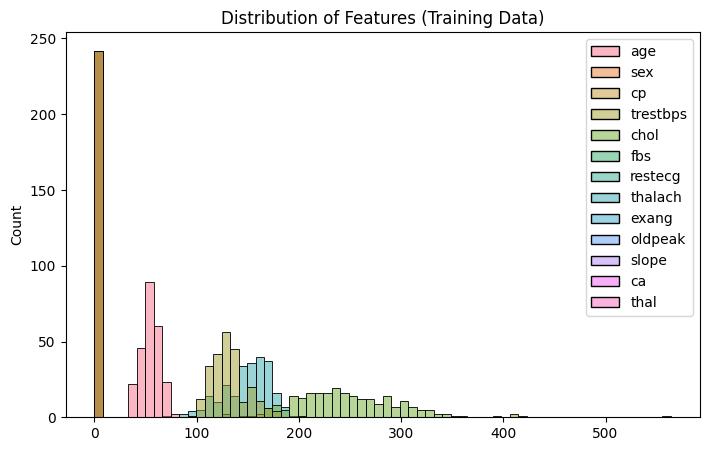

In [23]:
# Visualizing distribution of features
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=X_train)
plt.title('Distribution of Features (Training Data)')

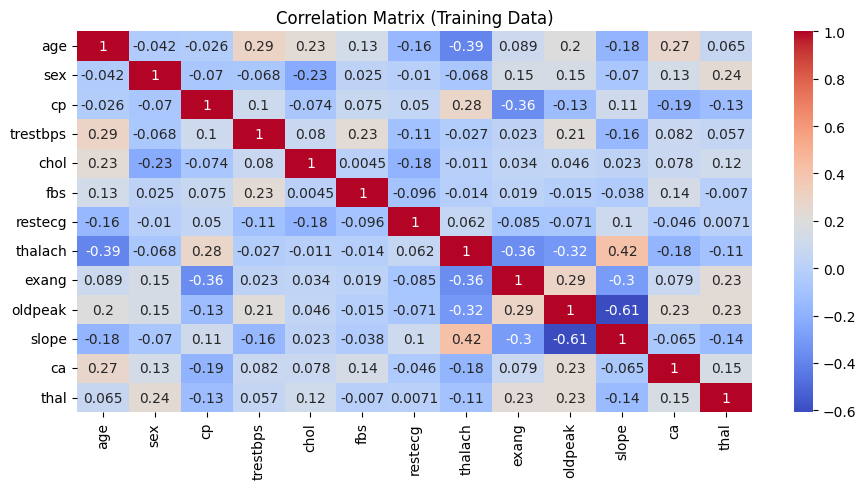

In [24]:
# Correlation heatmap for training data
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Training Data)')
plt.tight_layout()
plt.show()


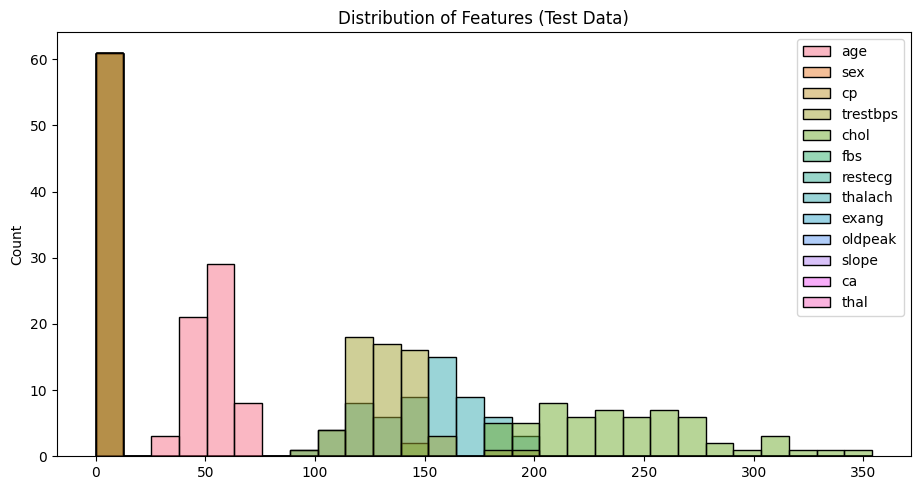

In [25]:
plt.figure(figsize=(18, 5))
# Distribution plot for test data
plt.subplot(1, 2, 1)
sns.histplot(data=X_test)
plt.title('Distribution of Features (Test Data)')
plt.tight_layout()
plt.show()

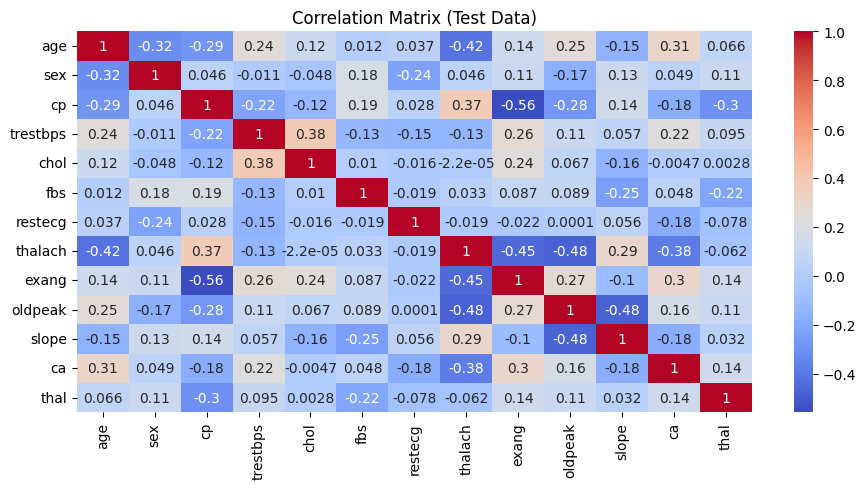

In [26]:
# Correlation heatmap for test data
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
sns.heatmap(X_test.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Test Data)')
plt.tight_layout()
plt.show()
